<a href="https://www.kaggle.com/code/victorvieirat/fakecorpusbr-classificao-noticias-falsas?scriptVersionId=145502942" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#Dataset
!git clone https://github.com/roneysco/Fake.br-Corpus.git
    
#Spacy
!python -m spacy download pt_core_news_sm

Cloning into 'Fake.br-Corpus'...
remote: Enumerating objects: 28763, done.
remote: Total 28763 (delta 0), reused 0 (delta 0), pack-reused 28763
Receiving objects: 100% (28763/28763), 37.10 MiB | 10.02 MiB/s, done.
Resolving deltas: 100% (14129/14129), done.
Updating files: 100% (21602/21602), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 44.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [2]:
import numpy as np 
import pandas as pd 
import os

FAKE_NAME = 'Desinformação'
TRUE_NAME = 'Legítima'
PATH = '/kaggle/working/'

In [3]:
import textwrap

def print_centered_with_color(text, label):
    red_bg = "\033[41m"  # Red background
    green_bg = "\033[42m"  # Green background
    reset_color = "\033[0m"  # Reset color

    # Determine the background color based on the label
    if label:
        background_color = green_bg
        label = TRUE_NAME
    else :
        background_color = red_bg
        label = FAKE_NAME

    terminal_width = 120 
    # Wrap and center the text
    wrapped_text = textwrap.fill(textwrap.shorten(text, width=1000), width=terminal_width)
    centered_text = label.center(terminal_width)

    # Print the text with the colored background and reset the color
    print(background_color + centered_text + reset_color)
    print(wrapped_text)
    print()
def count_words(text):
    # Split the text into words using spaces as the delimiter
    words = text.split()
    # Return the count of words
    return len(words)

# Introdução

Esse notebook tem por objetivo experimentar diversas metologia de extração de features no corpus Fake.BR e buscar encontrar métodos que superem os encontrados por Monteiro.

## O Corpus

Composto por notícias verdadeiras e falsas em português brasileiro em relação a sua metodologia de criação de temos algumas informações relevantes:

- *Coleta de Dados*: O processo de coleta foi semiautomático as notícias verdadeiras foram coletadas de sites conhecidos, já as notícias falsas foram coletadas e análisadas manudalmente, descartadas foram as consideradas meias verdades.

- *Tamanho*: Foram coletadas 7.200 notícias, com 3.600 notícias verdadeiras e 3.600 falsas. Os textos foram mantidos em formato de texto simples.

- *Intervalo de Tempo*: Dados coletados entre janeiro de 2016 a janeiro de 2018, as notícias que hoje são consideradas falsas e na época eram verdadeiras foram classificadas como verdadeiras.

- *Diversidade*: Metade dos dados são a respeito de notícias políticas, os outros tópicos são TV e celebridades; sociedade e notícias diárias; ciência e tecnologia; economia e, por fim, religiâo.


**MONTEIRO**, Rafael Augusto et al. Contributions to the study of fake news in portuguese: new corpus and automatic detection results. . Cham: Springer. Disponível em: http://dx.doi.org/10.1007/978-3-319-99722-3_33. Acesso em: 03 out. 2023. , 2018

# Contextualizando

O corpus "Fake.Br," consiste em notícias verdadeiras e falsas em português brasileiro. Foram coletadas 7.200 notícias ao longo de um período de dois anos (2016 - 2018), com esforços significativos para garantir a qualidade e a confiabilidade dos dados. As notícias foram divididas em seis categorias principais e rotuladas manualmente. Esse corpus é valioso para estudos linguísticos e de aprendizado de máquina, pois fornece instâncias positivas e negativas relacionadas a notícias verdadeiras e falsas alinhadas.

In [4]:
# Define the folder paths
true_folder = PATH + "Fake.br-Corpus/full_texts/true"
false_folder = PATH + "Fake.br-Corpus/full_texts/fake"

# Initialize empty lists to store data
text_data = []
folder_names = []
file_names = []

# Function to read text files from a folder and append data to the lists
def read_text_files(folder, label):
    for filename in os.listdir(folder):
        if filename.endswith(".txt"):
            with open(os.path.join(folder, filename), "r") as file:
                text = file.read()
                text_data.append(text)
                folder_names.append(label)
                file_names.append(filename.split(".")[0])

# Read text files from the "true" and "false" folders
read_text_files(true_folder, True)
read_text_files(false_folder, False)

# Create a DataFrame
data = {"text": text_data, "label": folder_names, "file_name": file_names}
df = pd.DataFrame(data)
df

,text,label,file_name
0,Movimentos lançam site para pressionar deputad...,True,2543
1,Pedidos de vista suspendem 50 julgamentos nest...,True,3366
2,É um acinte um presidente da República transp...,True,1128
3,MPF reforça pedido de condenação contra Bendin...,True,2727
4,Questionado no 12.o Congresso da Associação B...,True,3160
...,...,...,...
7195,E agora Renan? E agora Michel?. Questionado s...,False,2047
7196,"Aécio, o organizado: PF encontra recibos de ca...",False,1180
7197,"Xuxa chama motorista de táxi de ""fedido"" e red...",False,462
7198,Estudante americano (declarado morto em 2004) ...,False,360


In [5]:
df["label"].value_counts()

label
True     3600
False    3600
Name: count, dtype: int64

In [6]:
df_sample = df.sample(5,random_state=42)

for _, data in df_sample.iterrows():
    text = data["text"]
    label = data["label"]
    print_centered_with_color(text, label)

                                                        Legítima                                                        
Moro ouve Youssef, Cerveró e Baiano em ação contra Lula. Delatores foram ouvidos na tarde desta sexta-feira (26).. O
juiz federal Sérgio Moro ouviu, nesta sexta-feira (26), mais quatro testemunhas de acusação em um processo que apura um
suposto pagamento de propinas por parte da Odebrecht ao ex-presidente Luiz Inácio Lula da Silva. Além do ex-diretor da
área Internacional da Petrobras, também foram ouvidos como testemunhas de acusação os lobista Fernando Falcão Soares,
conhecido como Fernando Baiano, e Milton Pascowitch. Na ação penal, Lula é réu por ter, supostamente, recebido vantagens
indevidas da Odebrecht, por meio da compra de um terreno, em São Bernardo do Campo, na Grande São Paulo, e também de um
apartamento no mesmo andar do prédio em que ele mora, na mesma cidade. O terreno seria usado para construir uma nova
sede para o instituto social que leva o nome do

Contando as palavras

In [7]:
describe_true = df.loc[df['label']==True,'text'].apply(count_words).describe()
describe_true.name= TRUE_NAME
describe_false= df.loc[df['label']==False,'text'].apply(count_words).describe()
describe_false.name= FAKE_NAME
round(pd.concat([describe_true,describe_false],axis=1),2)

,Legítima,Desinformação
count,3600.00,3600.00
mean,1100.29,185.89
std,682.97,127.63
min,20.00,9.00
25%,642.00,115.00
50%,918.00,157.00
75%,1416.00,224.00
max,7517.00,2288.00


Note que os textos falsos em geral possuem menos palavras que os textos verdadeiros, por isso é necessário realizar uma normalização futuramente. Neste momomento iremos realizar um pré-processamento e realizar essa comparação novamente.

In [8]:
%%time
import re
from sklearn.pipeline import Pipeline # O Pipeline aplica uma lista de transformações. Você também pode adicionar um estimador no final, assim ele será completamente encapsulado.
from sklearn.preprocessing import FunctionTransformer
import unicodedata

import spacy
from nltk.corpus import stopwords

from multiprocessing import Pool, cpu_count

# Function to apply multiprocessing to DataFrame
def apply_multiprocessing(serie,func_apply):
    pool = Pool(cpu_count())
    data = (pool.map(func_apply, [serie.iloc[i] for i in range(len(serie))]))
    pool.close()
    pool.join()
    return pd.Series(data,index=serie.index)

def lower(texto):
    return texto.lower()

def remove_espacos_excessivos(texto):
    return re.sub(r'\s+', ' ', texto).strip() 

def remove_simbolos_repetidos(texto):
    return re.sub(r'(\W)\1+', r'\1', texto).strip()

def manter_palavras_maiores_que(texto, comprimento_minimo=2):
    return ' '.join([palavra for palavra in texto.split() if len(palavra) > comprimento_minimo])

def manter_apenas_letras(texto):
    return re.sub(r'[^a-zA-Z]', ' ', texto).strip()

def manter_apenas_letras_com_acentos(texto):
    return re.sub(r'[^a-zA-ZÀ-ÖØ-öø-ÿ]', ' ', texto).strip()

def remover_acentos(texto):
    return unicodedata.normalize('NFKD', texto).encode('ASCII', 'ignore').decode('ASCII') 

def lematizar_spacy(texto):
    doc = nlp_spacy(texto)
    return ' '.join([token.lemma_ for token in doc])



pipeline_limpar_texto = Pipeline([
    ('minuscula', FunctionTransformer(lower)),
    ('remove_espacos_excessivos', FunctionTransformer(remove_espacos_excessivos)),
    ('remove_simbolos_repetidos', FunctionTransformer(remove_simbolos_repetidos)),
    ('manter_apenas_letras_com_acentos', FunctionTransformer(manter_apenas_letras_com_acentos)),
    ('lematizar_spacy', FunctionTransformer(lematizar_spacy)),
    ('manter_palavras_maiores_que', FunctionTransformer(manter_palavras_maiores_que)),
])

nlp_spacy = spacy.load('pt_core_news_sm')

CPU times: user 6.47 s, sys: 1.1 s, total: 7.57 s
Wall time: 8 s


In [9]:
%%time
# Apply Spacy parser to DataFrame using multiprocessing
df_clean = df.copy()
df_clean['text'] = apply_multiprocessing(df_clean['text'],pipeline_limpar_texto.transform)

CPU times: user 354 ms, sys: 212 ms, total: 565 ms
Wall time: 5min 4s


In [10]:
df_sample = df_clean.sample(5,random_state=42)

for _, data in df_sample.iterrows():
    text = data["text"]
    label = data["label"]
    print_centered_with_color(text, label)

                                                        Legítima                                                        
Moro ouve youssef cerveró baiano ação contra Lula delator ser ouvir tarde este sexta feira juiz federal sérgio Moro
ouvir este sexta feira mais quatro testemunha acusação processo que apurar suposto pagamento propina por parte odebrecht
presidente Luiz inácio lula Silva além diretor área internacional petrobra também ser ouvir como testemunha acusação
lobisto Fernando falcão Soares conhecer como Fernando baiano Milton pascowitch ação penal lula ser réu por ter
supostamente receber vantagem indevir odebrecht por meio compra terreno São Bernardo Campo grande São Paulo também
apartamento mesmo andar prédio que ele morar mesmo cidade terreno ser usar para construir novo sede para instituto
social que levar nome presidente apartamento ser usar até hoje por Lula como casa para policial federal que fazer
segurança ele depoimento diretor área internacional petrobra nestor ce

In [11]:
!git clone https://github.com/victorvieirat/sklearn-experimenter.git
!mv /kaggle/working/sklearn-experimenter/experimenter.py experimenter.py

Cloning into 'sklearn-experimenter'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 25 (delta 9), reused 21 (delta 8), pack-reused 0
Unpacking objects: 100% (25/25), 24.10 KiB | 1.34 MiB/s, done.


In [12]:
import nltk
stop_words = stopwords.words('portuguese')
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

# Certifique-se de baixar as stopwords do NLTK uma vez (nltk.download('stopwords'))
n_max_features = round(len(df_clean)*0.1)
# Inicialize o vetorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words,ngram_range=(1,2),max_features=n_max_features,max_df=0.9)
# Ajuste e transforme os dados
tfidf_matrix = tfidf_vectorizer.fit_transform(df_clean['text'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df['label'] = df_clean['label']/1

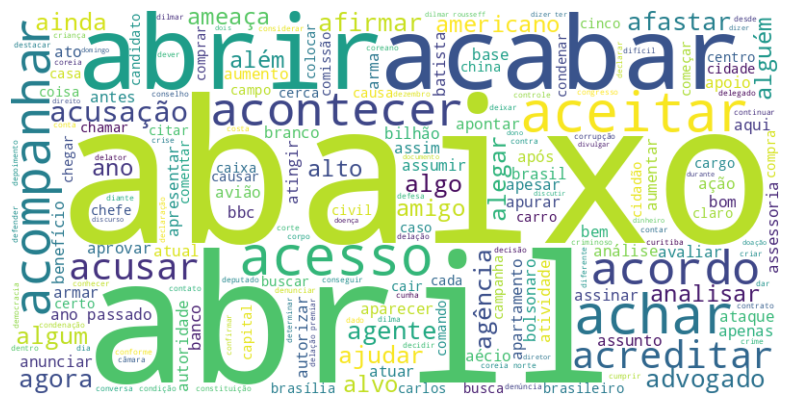

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
tfidf_scores = np.asarray(tfidf_matrix.mean(axis=0)).ravel()
sorted_tfidf_scores = sorted(tfidf_scores, reverse=True)
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = np.asarray(tfidf_matrix.mean(axis=0)).ravel()
sorted_tfidf_scores = sorted(tfidf_scores, reverse=True)
tfidf_scores_dict = {term: score for term, score in zip(feature_names, sorted_tfidf_scores)}
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Generate the word cloud
wordcloud.generate_from_frequencies(tfidf_scores_dict)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [14]:
from experimenter import ModelRunner

In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression
 
runner = ModelRunner()
#Bases
runner.data.add_datasets([tfidf_df])
#Splits
runner.splits.add_fold([5]) #Kfolds
#Modelos
runner.models.add_models([ 
                         LogisticRegression(n_jobs=-1),
                         RandomForestClassifier(n_jobs=-1),
                         SVC(),
                         MLPClassifier(max_iter=1000)
                         ])                        
#Métricas
runner.metrics.add_score([
                          'acc',
                          'f1_micro'] 
                          )
#Seeds
runner.random.add_model_seed([42])

runner.summarize()

runner.save_path ='output.pkl'

Number of dataframes: 1
Metrics used: accuracy_score, f1_score
Split method:
     - Holdouts: []
     - Folds: [5]
Seeds methods:
     - Each model will run 1 times witch seeds: [42]
     - Each split will run 1 times witch seeds: [42]
Models used: LogisticRegression, RandomForestClassifier, SVC, MLPClassifier


In [16]:
runner.run(save_each_evaluation=True)
df_output = pd.DataFrame(runner.results)
df_output.head(5)

,df_name,model_name,model_params,split_type,split_value,model_seed,split_seed,accuracy_score,f1_score
0,Dataset0,LogisticRegression,"{'C': 1.0, 'class_weight': None, 'dual': False...",fold_1/5,5,42,42,0.956250,0.956250
1,Dataset0,LogisticRegression,"{'C': 1.0, 'class_weight': None, 'dual': False...",fold_2/5,5,42,42,0.952083,0.952083
2,Dataset0,LogisticRegression,"{'C': 1.0, 'class_weight': None, 'dual': False...",fold_3/5,5,42,42,0.959722,0.959722
3,Dataset0,LogisticRegression,"{'C': 1.0, 'class_weight': None, 'dual': False...",fold_4/5,5,42,42,0.943750,0.943750
4,Dataset0,LogisticRegression,"{'C': 1.0, 'class_weight': None, 'dual': False...",fold_5/5,5,42,42,0.954167,0.954167


In [17]:
df_output.groupby('model_name')[['accuracy_score','f1_score']].agg(['mean','std'])

accuracy_score            f1_score          
                                 mean       std      mean       std
model_name                                                         
LogisticRegression           0.953194  0.005986  0.953194  0.005986
MLPClassifier                0.933611  0.007820  0.933611  0.007820
RandomForestClassifier       0.957361  0.003129  0.957361  0.003129
SVC                          0.960556  0.003655  0.960556  0.003655